<b>Description</b><br>
Sales prices of houses sold in the city of Windsor, Canada, during July, August and September, 1987.

<b>Metadata<br></b>
A data frame containing 546 observations on 12 variables.<br>

<b>price:</b>
Sale price of a house.<br>

<b>lotsize:</b>
Lot size of a property in square feet.<br>

<b>bedrooms:</b>
Number of bedrooms.<br>

<b>bathrooms:</b>
Number of full bathrooms.<br>

<b>stories:</b>
Number of stories excluding basement.<br>

<b>driveway:</b>
Factor. Does the house have a driveway?<br>

<b>recreation:</b>
Factor. Does the house have a recreational room?<br>

<b>fullbase:</b>
Factor. Does the house have a full finished basement?<br>

<b>gasheat:</b>
Factor. Does the house use gas for hot water heating?<br>

<b>aircon:</b>
Factor. Is there central air conditioning?<br>

<b>garage:</b>
Number of garage places.<br>

<b>prefer:</b>
Factor. Is the house located in the preferred neighborhood of the city?<br>

# Imports

In [906]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style('darkgrid')

Data

In [907]:
data = pd.read_csv('HousePrices_Canada.csv')

In [908]:
# Check N or sample size 
row, column = data.shape
print('Rows:', row)
print('Columns:', column)

Rows: 546
Columns: 13


NaN Values

<AxesSubplot:>

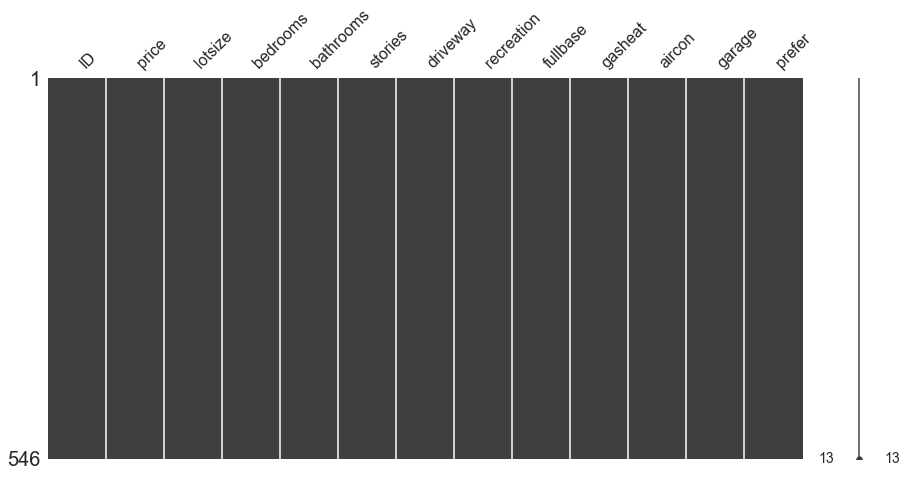

In [909]:
msno.matrix(data, figsize=(15,7))

In [910]:
data.head()

,ID,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [911]:
data.drop(columns= 'ID', inplace= True)

Dummy Variables

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'lotsize'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'garage'}>]], dtype=object)

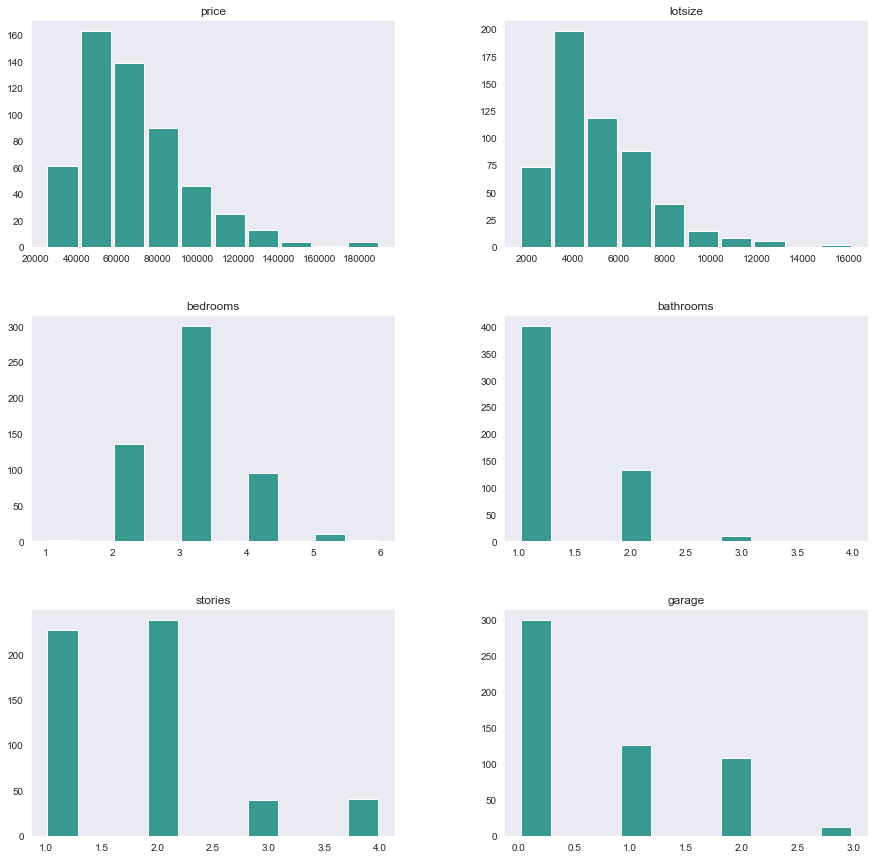

In [912]:
data.hist(linestyle='solid',  color='#379990', figsize=(15,15), rwidth=0.9, grid=False)

In [913]:
dummy_data = pd.get_dummies(data, columns= ['bedrooms','bathrooms','stories','garage'])

In [914]:
dummy_data.columns

Index(['price', 'lotsize', 'driveway', 'recreation', 'fullbase', 'gasheat',
       'aircon', 'prefer', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'stories_1', 'stories_2', 'stories_3',
       'stories_4', 'garage_0', 'garage_1', 'garage_2', 'garage_3'],
      dtype='object')

In [915]:
dummy_data['driveway']=dummy_data['driveway'].replace(['yes', 'no'],[1,0])
dummy_data['recreation']=dummy_data['recreation'].replace(['yes', 'no'],[1,0])
dummy_data['fullbase']=dummy_data['fullbase'].replace(['yes', 'no'],[1,0])
dummy_data['gasheat']=dummy_data['gasheat'].replace(['yes', 'no'],[1,0])
dummy_data['aircon']=dummy_data['aircon'].replace(['yes', 'no'],[1,0])
dummy_data['prefer']=dummy_data['prefer'].replace(['yes', 'no'],[1,0])

Dist of Y(Price)

<AxesSubplot:>

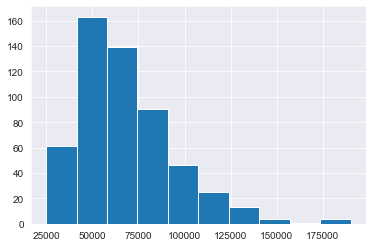

In [916]:
dummy_data['price'].hist()

# Data Exploration

In [917]:
dummy_data

,price,lotsize,driveway,recreation,fullbase,gasheat,aircon,prefer,bedrooms_1,bedrooms_2,...,bathrooms_3,bathrooms_4,stories_1,stories_2,stories_3,stories_4,garage_0,garage_1,garage_2,garage_3
0,42000.0,5850,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,38500.0,4000,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,49500.0,3060,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,60500.0,6650,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,61000.0,6360,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
542,94000.0,6000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
543,103000.0,6000,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
544,105000.0,6000,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [918]:
dummy_data.columns

Index(['price', 'lotsize', 'driveway', 'recreation', 'fullbase', 'gasheat',
       'aircon', 'prefer', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'stories_1', 'stories_2', 'stories_3',
       'stories_4', 'garage_0', 'garage_1', 'garage_2', 'garage_3'],
      dtype='object')

In [919]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       546 non-null    float64
 1   lotsize     546 non-null    int64  
 2   bedrooms    546 non-null    int64  
 3   bathrooms   546 non-null    int64  
 4   stories     546 non-null    int64  
 5   driveway    546 non-null    object 
 6   recreation  546 non-null    object 
 7   fullbase    546 non-null    object 
 8   gasheat     546 non-null    object 
 9   aircon      546 non-null    object 
 10  garage      546 non-null    int64  
 11  prefer      546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [920]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,546.0,68121.597070,26702.670926,25000.0,49125.0,62000.0,82000.0,190000.0
lotsize,546.0,5150.265568,2168.158725,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,546.0,2.965201,0.737388,1.0,2.0,3.0,3.0,6.0
bathrooms,546.0,1.285714,0.502158,1.0,1.0,1.0,2.0,4.0
stories,546.0,1.807692,0.868203,1.0,1.0,2.0,2.0,4.0
garage,546.0,0.692308,0.861307,0.0,0.0,0.0,1.0,3.0


FEATURE SELECTION(WORKING)

In [921]:
# from sklearn.feature_selection import VarianceThreshold

# Model Building

Data Transformation(Price)

In [922]:
y = np.log(dummy_data['price'])

<AxesSubplot:>

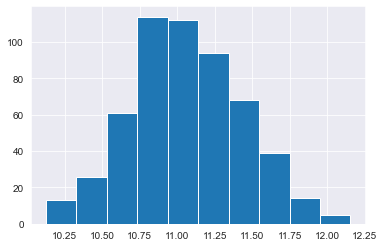

In [923]:
y.hist()

In [924]:
X = dummy_data[['lotsize', 'driveway', 'recreation', 'fullbase',
       'gasheat', 'aircon', 'prefer', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'stories_1', 'stories_2', 'stories_3',
       'stories_4', 'garage_0', 'garage_1', 'garage_2', 'garage_3']]

Test/Train Split

In [925]:
from sklearn.model_selection import train_test_split

In [926]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [927]:
from sklearn.linear_model import LinearRegression

In [928]:
lm = LinearRegression()

In [929]:
lm.fit(X_train,y_train)

LinearRegression()

Insights

In [930]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients = coeffecients.sort_values(by='Coeffecient')

<AxesSubplot:xlabel='Coeffecient'>

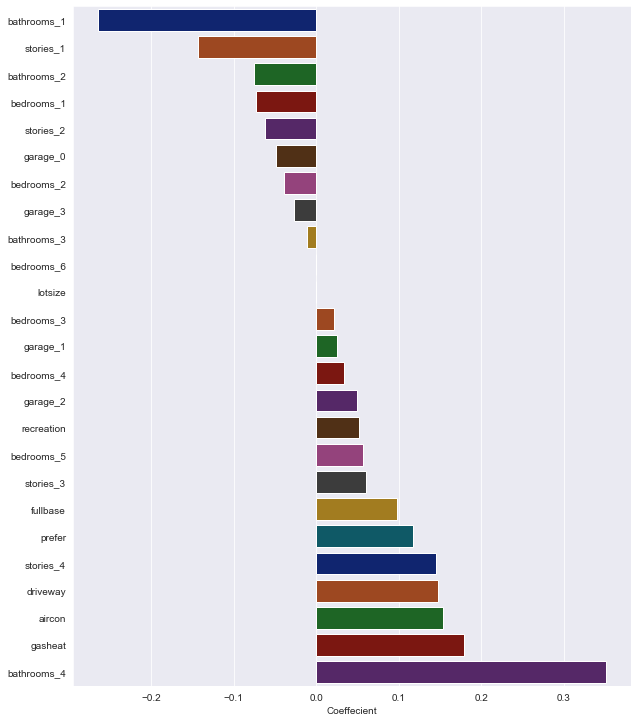

In [931]:
plt.figure(figsize=(10, 0.5*len(coeffecients)))
sns.barplot(data= coeffecients, y= coeffecients.index, x= 'Coeffecient', orient='h', palette= 'dark')   

# Prediction

In [932]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

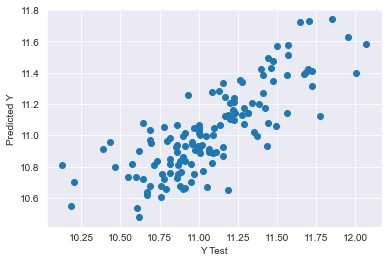

In [933]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluation

In [934]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.16915877087252829
MSE: 0.05094945458346965
RMSE: 0.22571985863780275


c:\Users\Null\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

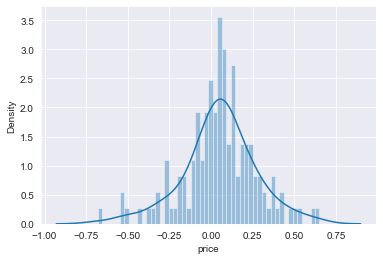

In [935]:
sns.distplot((y_test-predictions),bins=50)

In [936]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.55 %
Standard Deviation: 6.97 %
